In [1]:
import pandas as pd

# relevant file paths ----
path_input_groups = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/01-TC-Assignment/'
name_input_file_groups = 'Adm2_TC_Assignment_Recurrence.csv'

path_input_outcomevar = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/00-Data-Sources/00-Cloud-to-Street/01-District-level/Data-Observational/'
name_input_file_outcomevar = 'Ghana_Stats_Rec_v2.csv'

path_output = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/02-Parallel-Trends-Analysis/'
name_output_file = 'Before_After_Outcome_Variable_Of_Interest.csv'


In [2]:
# read in datasets ---
tot_flood_risk = pd.read_csv(path_input_groups+name_input_file_groups) # Treatment-Control Assigned based on flood risk
x = pd.read_csv(path_input_outcomevar+name_input_file_outcomevar) # outcome variable of interest

# merge datasets together ----
df = x.merge(tot_flood_risk, left_on='admin2name', right_on='Region')
df = df[['year', 'admin2name', 'pop_sum', 'crop_area', 'Treatment']]
df = df[df['year'] <2020]

# divide into treatment and control groups ---
control = df[df['Treatment'] == 0].groupby('year', as_index=False).mean()
treatment = df[df['Treatment'] == 1].groupby('year', as_index=False).mean()


Text(2019, 86.3648773483418, '  Program End')

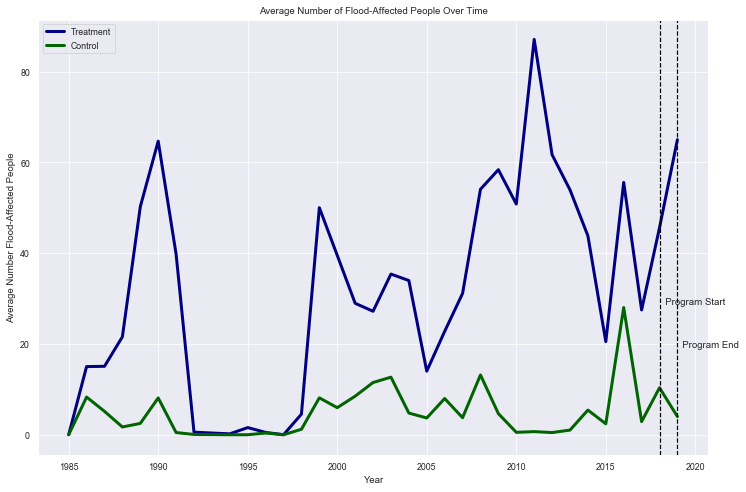

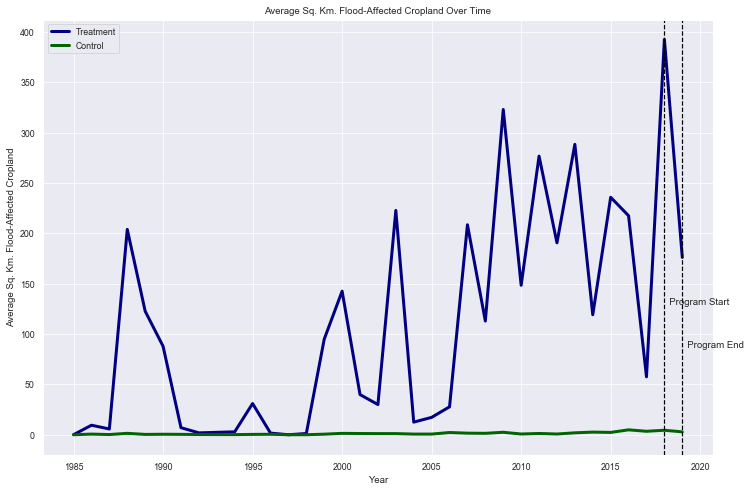

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# observe if parallel trends exist -----

sns.set_context("paper")
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 8))

# plot treatment and control lines
sns.lineplot(x = 'year', y = 'pop_sum', label='Treatment',color='navy', data=treatment, lw=3)
sns.lineplot(x = 'year', y = 'pop_sum', label='Control', color='darkgreen', data=control, lw=3)

plt.title('Average Number of Flood-Affected People Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number Flood-Affected People')
plt.axvline(2018, color='black', ls='--') # plot vertical line corresponding to treatment year
plt.axvline(2019, color='black', ls='--')
ymin, ymax = ax.get_ylim() # get yaxis range to label vertical lines in an appropriate location
plt.text(2018, (ymax - ymin)*0.3, '  Program Start')
plt.text(2019, (ymax - ymin)*0.2, '  Program End')

fig, ax = plt.subplots(figsize=(12, 8))

# plot treatment and control lines
sns.lineplot(x = 'year', y = 'crop_area', label='Treatment',color='navy', data=treatment, lw=3)
sns.lineplot(x = 'year', y = 'crop_area', label='Control', color='darkgreen', data=control, lw=3)

plt.title('Average Sq. Km. Flood-Affected Cropland Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sq. Km. Flood-Affected Cropland')
plt.axvline(2018, color='black', ls='--') # plot vertical line corresponding to treatment year
plt.axvline(2019, color='black', ls='--')
ymin, ymax = ax.get_ylim() # get yaxis range to label vertical lines in an appropriate location
plt.text(2018, (ymax - ymin)*0.3, '  Program Start')
plt.text(2019, (ymax - ymin)*0.2, '  Program End')
